In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
w=1 #weight
b=0 #buyous
h=1.5 #hyperparameter
L=0.0001#learning rate -> try playing around with the value to see which ones converge
epoch=100#define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list=[]

In [0]:
data=pd.read_csv('data.csv',header=0)

In [0]:
X=data['size_in_sq_ft']
Y=data['price_x1000_sh']
N=float(len(X))

In [0]:
def lasso_regression(h,w,b,N,L):#main function i.e. gradient descent to learn the line of best fit
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    if w is 0:
      break
    Y_hat = w*X + b
    epoch_error_list.append((2/N) * sum(Y - Y_hat)**2 - h * abs(w))
    D_m = (-4/N) * sum(X * (Y - Y_hat)) - h * w / abs(w)
    D_c = (-4/N) * sum(Y - Y_hat) - h
    w = w - L * D_m
    b = b - L * D_c
  #you can print the final w and b after all iterations are done
  print("final w is: ",w," and final b is: ",b)
  #return final predicted value of Y-dependent variable
  return Y_hat,epoch_error_list


final w is:  1.4789349970041217  and final b is:  0.03615178454285843


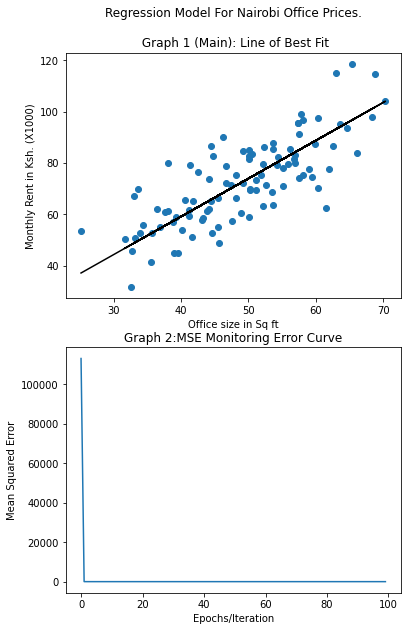

In [15]:
#call gradient descent fit function
returned_params=lasso_regression(h,w,b,N,L)
y_predicted=returned_params[0]
all_epoch_errors=returned_params[1]

#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot(X,y_predicted,color='black')
ax2.set_title("Graph 2:Lasso Regression Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Lasso Error")
ax2.plot(list(range(epoch)),all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_error_list.clear()